In [44]:
import numpy as np
import io
from stl import mesh
import os
import cv2
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


In [45]:
# Đường dẫn thư mục pair
g_path = 'D:\Xulyanh\wb_2D3Dretrieval_data\pairs'

# Đường dẫn thư mục model STL
stl_path = os.path.join(g_path,'stl') 

# Đường dẫn thư mục convert 3d model -> ảnh 2D 
stl_2d_path = os.path.join(g_path,'stl_to_2d_pairs')

# Đường dẫn queries 
queries_path =  os.path.join(g_path,'print') 

# Số lượng tệp trong thư mục mô hình STL
num_file= len(os.listdir(stl_path))
# Kích thước ảnh
img_size = (256,256)

In [46]:
def crop(image):
    contours, hierarchy = cv2.findContours(image ,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    cropped_image = None
    min_x = min_y = float('inf')
    max_x = max_y = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if x==0 or y==0:
            continue
        # Tìm tọa độ min-max
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x + w)
        max_y = max(max_y, y + h)
    return cv2.resize(image[min_y:max_y, min_x:max_x], img_size)  

def stl_to_2d(file_path):
    # Load the STL file
    _mesh = mesh.Mesh.from_file(file_path)
    # Tính giới hạn box
    min_coords = np.min(_mesh.points, axis=0)
    max_coords = np.max(_mesh.points, axis=0)
    # Chọn trục cắt  (e.g., the z-axis)
    cutting_axis = 2  
    #Tìm giá trị tọa độ nằm giữa cực tiểu và cực đại dọc theo trục cắt
    cutting_plane = min_coords[cutting_axis] + 6*(max_coords[cutting_axis] - min_coords[cutting_axis]) / 7.0
    # Phân vùng mô hình theo mặt phẳng cắt
    vectors_above_plane = []
    for vector in _mesh.vectors:
        if np.all(vector[:, cutting_axis] > cutting_plane):
            vectors_above_plane.append(vector)
    # Tạo một đối tượng lưới mới từ các vectơ phía trên mặt phẳng cắt
    above_cutting_plane_mesh = mesh.Mesh(np.zeros(len(vectors_above_plane), dtype=mesh.Mesh.dtype))
    above_cutting_plane_mesh.vectors = vectors_above_plane

    figure = plt.figure()
    axes = figure.add_subplot(projection='3d')
    axes.view_init(elev=90, azim=-90)
    # Tải các tệp STL và thêm các vectơ vào biểu đồ
    poly_collection = mplot3d.art3d.Poly3DCollection(above_cutting_plane_mesh.vectors)
    poly_collection.set_color((0,0,0))  
    scale = above_cutting_plane_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    axes.add_collection3d(poly_collection)
    plt.grid(False)
    plt.axis('off')
    buffer = io.BytesIO()
    figure.savefig(buffer, format='jpg')
    buffer.seek(0)
    image_buffer = cv2.imdecode(np.frombuffer(buffer.getvalue(), dtype=np.uint8), -1)
    gray = cv2.cvtColor(image_buffer, cv2.COLOR_BGR2GRAY)
    ret,thresh_3d = cv2.threshold(gray,150,255,0)
    image_ = crop(thresh_3d)
    buffer.close()
    plt.close()
    return image_

(<matplotlib.image.AxesImage at 0x2432c536bd0>, (-0.5, 255.5, 255.5, -0.5))

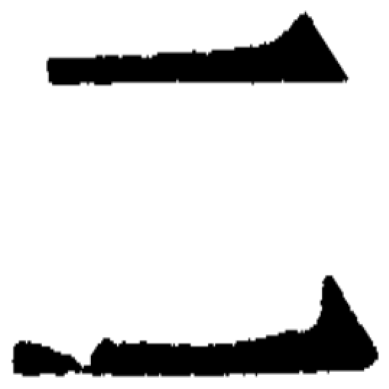

In [49]:
plt.imshow(stl_to_2d('D:/Xulyanh/wb_2D3Dretrieval_data/database/88.stl'), cmap = 'gray'), plt.axis('off')
#show ảnh 2d từ mô hình 3d

In [50]:
# Convert mô hình 3D -> ảnh 2d cho vào thư mục mới
stl_path = os.path.join(g_path,'stl') 
stl_2d_path = os.path.join(g_path,'stl_to_2d_pairs')
if not os.path.exists(stl_2d_path):
    os.mkdir(stl_2d_path) 
index=1
num_file= len(os.listdir(stl_path))
for file in os.listdir(stl_path): 
    print(f'{index}/{num_file}')
    index+=1
    path = os.path.join(stl_path,file)
    img_2d = stl_to_2d(path)
    out_path = os.path.join(stl_2d_path,file+'.png') 
    cv2.imwrite(out_path, img_2d)

1/228
2/228
3/228
4/228
5/228
6/228
7/228
8/228
9/228
10/228
11/228
12/228
13/228
14/228
15/228
16/228
17/228
18/228
19/228
20/228
21/228
22/228
23/228
24/228
25/228
26/228
27/228
28/228
29/228
30/228
31/228
32/228
33/228
34/228
35/228
36/228
37/228
38/228
39/228
40/228
41/228
42/228
43/228
44/228
45/228
46/228
47/228
48/228
49/228
50/228
51/228
52/228
53/228
54/228
55/228
56/228
57/228
58/228
59/228
60/228
61/228
62/228
63/228
64/228
65/228
66/228
67/228
68/228
69/228
70/228
71/228
72/228
73/228
74/228
75/228
76/228
77/228
78/228
79/228
80/228
81/228
82/228
83/228
84/228
85/228
86/228
87/228
88/228
89/228
90/228
91/228
92/228
93/228
94/228
95/228
96/228
97/228
98/228
99/228
100/228
101/228
102/228
103/228
104/228
105/228
106/228
107/228
108/228
109/228
110/228
111/228
112/228
113/228
114/228
115/228
116/228
117/228
118/228
119/228
120/228
121/228
122/228
123/228
124/228
125/228
126/228
127/228
128/228
129/228
130/228
131/228
132/228
133/228
134/228
135/228
136/228
137/228
138/228
139/

In [51]:
#Xử lí ảnh 2d
def process_2d(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh_2d = cv2.threshold(gray,150,255,0)
    return crop(thresh_2d)

In [52]:
def find_similar(img_path):
    stl_2d_folder = stl_2d_path
    input_image = process_2d(cv2.imread(img_path))
    binary_images_folder = stl_2d_path
    image_matches = []

    for filename in os.listdir(binary_images_folder):
        image_path = os.path.join(binary_images_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # So khớp mẫu ảnh
        match = cv2.matchTemplate(image, input_image, cv2.TM_CCOEFF_NORMED)
        image_matches.append((filename, match.max()))

    sorted_images = sorted(image_matches, key=lambda x: x[1], reverse=True)
    top_5 = [path for path, match_value in sorted_images[:5]]
    return top_5

In [53]:
# Tạo tệp nhãn csv 
f = open(f"{g_path}/labels_pairs.csv", "w") 

queries_path =  os.path.join(g_path,'print') 

num_queries = len(os.listdir(queries_path))
for filename in os.listdir(queries_path):
    f.write(filename + ',"' + filename.replace("png", "stl") + '"' +'\n')
f.close()

In [54]:
# Viết 5 kết quả hàng đầu vào tệp CSV
f = open(f"{g_path}/test_template.csv", "w")
f.write('query,label\n')
print(g_path)
queries_path =  os.path.join(g_path,'print') 
index = 1
num_queries = len(os.listdir(queries_path))
for filename in os.listdir(queries_path):
    print(f'{index}/{num_queries}')
    index+=1
    img_path = os.path.join(queries_path,filename) 
    top5 = find_similar(img_path)
    top5_tostring = ','.join([n[:-4] for n in top5])
    f.write(filename + ',"' + top5_tostring +'"'+'\n')
f.close()

D:\Xulyanh\wb_2D3Dretrieval_data\pairs
1/228
2/228
3/228
4/228
5/228
6/228
7/228
8/228
9/228
10/228
11/228
12/228
13/228
14/228
15/228
16/228
17/228
18/228
19/228
20/228
21/228
22/228
23/228
24/228
25/228
26/228
27/228
28/228
29/228
30/228
31/228
32/228
33/228
34/228
35/228
36/228
37/228
38/228
39/228
40/228
41/228
42/228
43/228
44/228
45/228
46/228
47/228
48/228
49/228
50/228
51/228
52/228
53/228
54/228
55/228
56/228
57/228
58/228
59/228
60/228
61/228
62/228
63/228
64/228
65/228
66/228
67/228
68/228
69/228
70/228
71/228
72/228
73/228
74/228
75/228
76/228
77/228
78/228
79/228
80/228
81/228
82/228
83/228
84/228
85/228
86/228
87/228
88/228
89/228
90/228
91/228
92/228
93/228
94/228
95/228
96/228
97/228
98/228
99/228
100/228
101/228
102/228
103/228
104/228
105/228
106/228
107/228
108/228
109/228
110/228
111/228
112/228
113/228
114/228
115/228
116/228
117/228
118/228
119/228
120/228
121/228
122/228
123/228
124/228
125/228
126/228
127/228
128/228
129/228
130/228
131/228
132/228
133/228
134/2